

The code imports necessary libraries for file operations, image processing, data analysis, and visualization. It then defines a path to a zip file (`archive.zip`) containing the dataset and specifies a directory (`archive`) where the contents of this zip file will be extracted. Finally, the code extracts the contents of the zip file into the defined directory, making the dataset ready for subsequent processing or analysis.


In [2]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import zipfile

# Define paths
data_dir = 'archive.zip'
extraction_dir = 'archive'  # Directory where contents of the zip file will be extracted
training_dir = os.path.join(extraction_dir, 'training_data')

# Extract zip file
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

The code  will list and print the names of all items (directories and files) present in the extraction_dir directory.



In [3]:
for item in os.listdir(extraction_dir):
    print(item)


data
data2


The code creates a path named training_dir by joining the extraction_dir with subdirectories 'data' and 'training_data'. In essence, it assumes that within the extracted content, there's a structure where the training dataset is located inside /content/archive/data/training_data. This training_dir path can then be used to access and process the training data directly.

In [4]:
training_dir = os.path.join(extraction_dir, 'data', 'training_data')


In [5]:
training_dir = os.path.join(extraction_dir, 'data2', 'training_data')


The code loads images and their corresponding labels from the `training_dir` into two lists. It then creates a DataFrame with this data. For visualization, it determines a subset of unique labels and a set number of images for each label. It subsequently displays a grid of randomly selected images, captioned by their labels, ensuring that images from diverse labels are showcased.

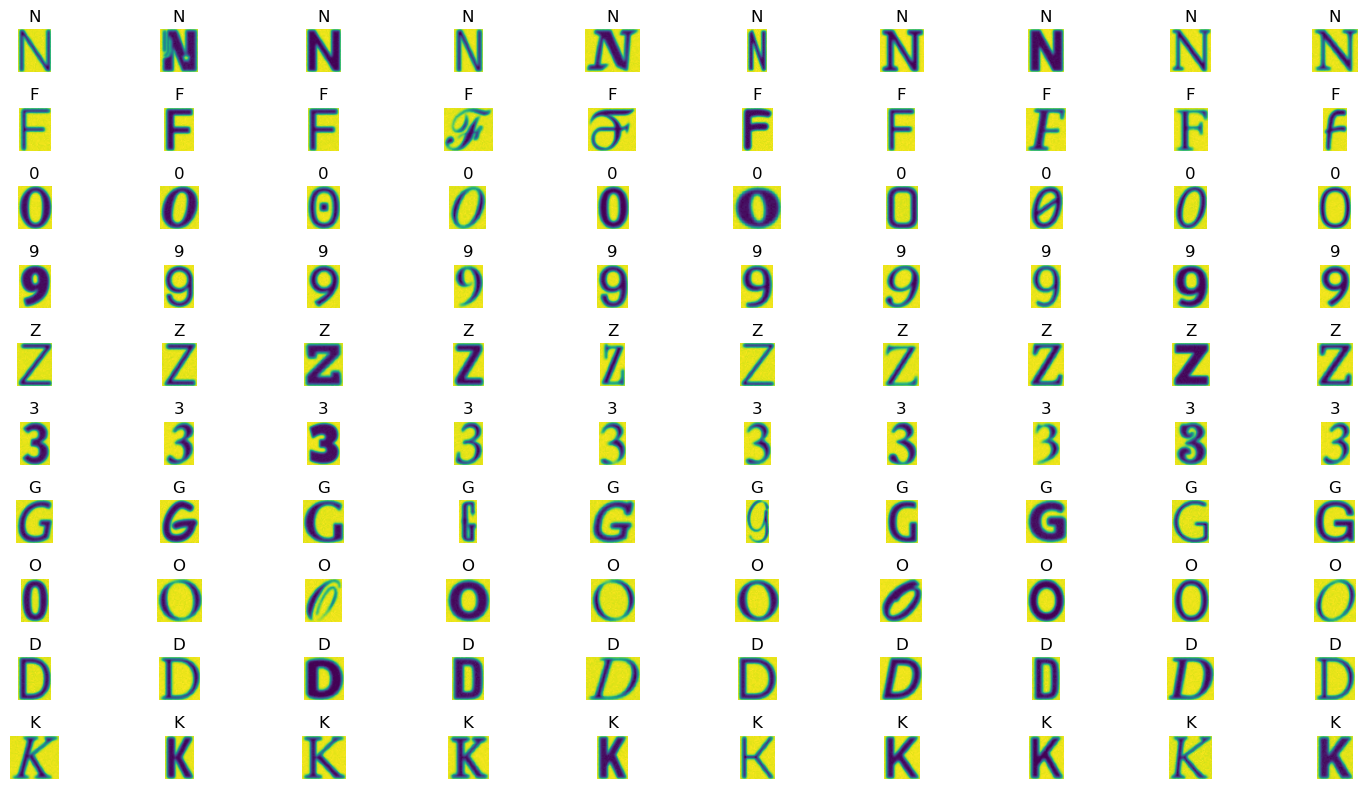

In [6]:


# Load data
data = []
labels = []

for label in os.listdir(training_dir):
    label_dir = os.path.join(training_dir, label)
    for image_file in os.listdir(label_dir):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            data.append(image.copy())
            labels.append(label)

df = pd.DataFrame({'data': data, 'label': labels})

# Display images
num_images_to_display = 10  # Reduce this number if you want to see fewer images per label
num_labels_to_display = 10  # Number of unique labels to display images for

unique_labels = list(set(labels))
if len(unique_labels) > num_labels_to_display:
    unique_labels = random.sample(unique_labels, num_labels_to_display)

plt.figure(figsize=(15, 8))

for idx, label in enumerate(unique_labels):
    label_dir = os.path.join(training_dir, label)
    image_files = random.sample(os.listdir(label_dir), num_images_to_display)

    for i, image_file in enumerate(image_files):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            plt.subplot(len(unique_labels), num_images_to_display, idx*num_images_to_display + i + 1)
            plt.imshow(image)
            plt.title(label)
            plt.axis('off')

plt.tight_layout()
plt.show()


The code quickly extracts the dimensions of images within `training_dir` using PIL's `ImageFile.Parser()`, avoiding the need to fully load each image. It then visualizes the distribution of these dimensions using histograms: one for image widths and another for heights, giving insight into the range and most common dimensions of the images in the dataset.

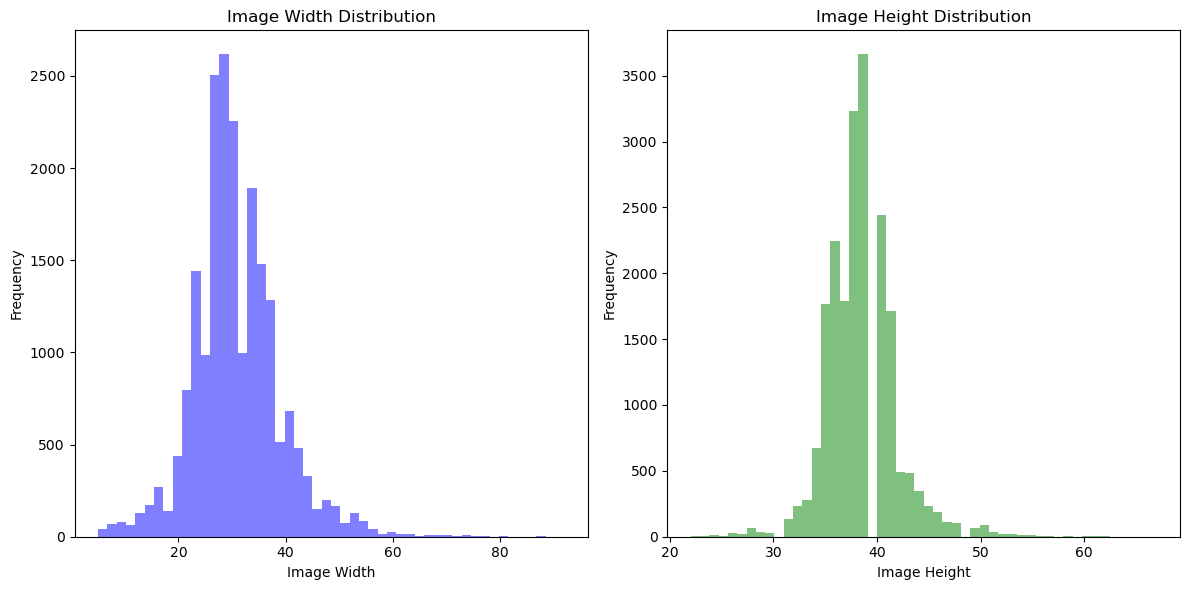

In [57]:
from PIL import ImageFile

# Use unique labels to avoid redundant directory scans
unique_labels = set(labels)

widths = []
heights = []

for label in unique_labels:
    label_dir = os.path.join(training_dir, label)
    for image_file in os.listdir(label_dir):
        # Get image size without opening the image
        with open(os.path.join(label_dir, image_file), 'rb') as f:
            parser = ImageFile.Parser()
            while True:
                data = f.read(1024)
                if not data:
                    break
                parser.feed(data)
                if parser.image:
                    width, height = parser.image.size
                    widths.append(width)
                    heights.append(height)
                    break

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='blue', alpha=0.5)
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.title('Image Width Distribution')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='green', alpha=0.5)
plt.xlabel('Image Height')
plt.ylabel('Frequency')
plt.title('Image Height Distribution')

plt.tight_layout()
plt.show()


The df.info() method provides a concise summary of a pandas DataFrame, detailing the number of entries, columns' data types, non-null values count, and memory usage, giving an overview of the DataFrame's structure and content.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628 entries, 0 to 20627
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    20628 non-null  object
 1   label   20628 non-null  object
dtypes: object(2)
memory usage: 322.4+ KB


The `df['label'].value_counts()` command is used to count the number of occurrences of each unique value in the 'label' column of the DataFrame `df`. It will return a Series with the unique labels as the index and their respective counts as values. The labels with the highest counts will be listed first. This is useful for understanding the distribution of different labels in a dataset, especially in classification problems to check if the dataset is balanced or imbalanced.

In [9]:
df['label'].value_counts()


0    573
1    573
K    573
L    573
M    573
N    573
O    573
P    573
Q    573
R    573
S    573
T    573
U    573
V    573
W    573
X    573
Y    573
J    573
I    573
H    573
8    573
2    573
3    573
4    573
5    573
6    573
7    573
9    573
G    573
A    573
B    573
C    573
D    573
E    573
F    573
Z    573
Name: label, dtype: int64

In [10]:
# check for null values
df.isnull().sum()

data     0
label    0
dtype: int64

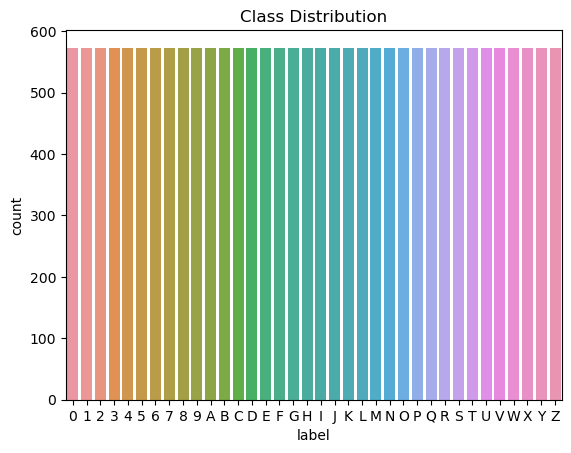

In [11]:
# check for class imbalance
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.show()

In [12]:
df.describe()

,data,label
count,20628,20628
unique,20628,36
top,<PIL.Image.Image image mode=L size=27x30 at 0x...,0
freq,1,573


Analyze Image Aspect Ratios:



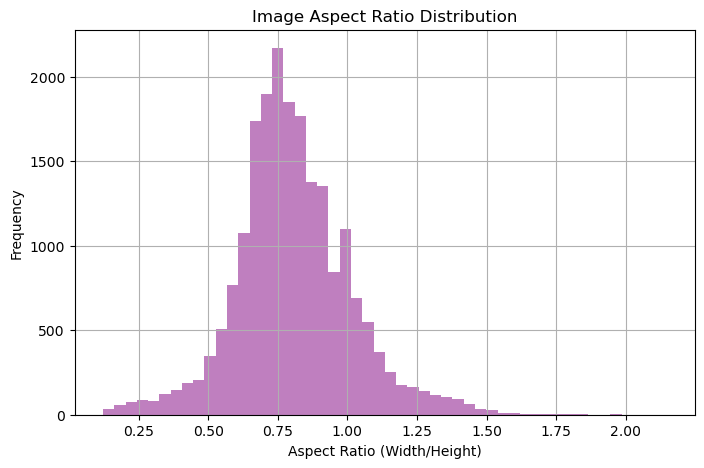

In [13]:
# Analyzing Image Aspect Ratios
aspect_ratios = [w/h for w, h in zip(widths, heights)]
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=50, color='purple', alpha=0.5)
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.title('Image Aspect Ratio Distribution')
plt.grid(True)
plt.show()


 Display the Most Common and Least Common Labels:

In [14]:
# Displaying the most common and least common labels
label_counts = df['label'].value_counts()
print("Most common labels:\n", label_counts.head())
print("\nLeast common labels:\n", label_counts.tail())


Most common labels:
 0    573
1    573
K    573
L    573
M    573
Name: label, dtype: int64

Least common labels:
 C    573
D    573
E    573
F    573
Z    573
Name: label, dtype: int64


Display Sample Images from the Most and Least Common Labels:



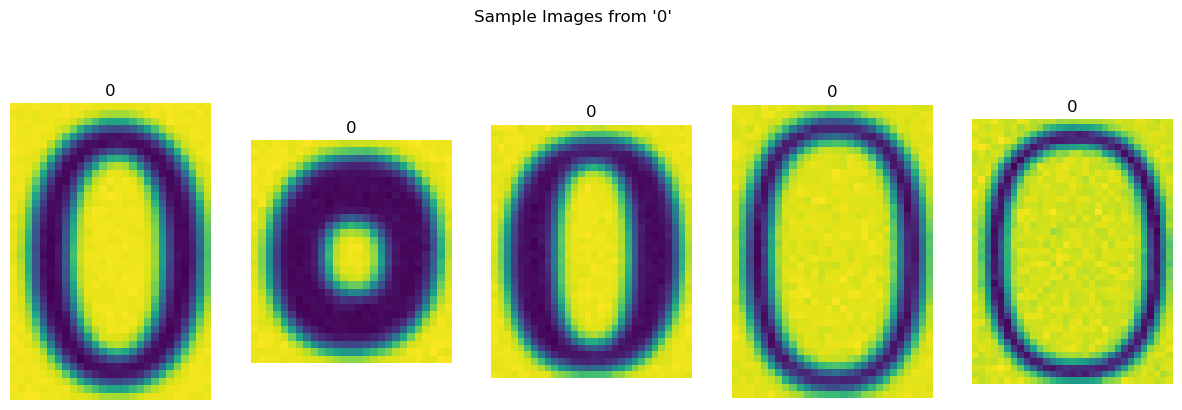

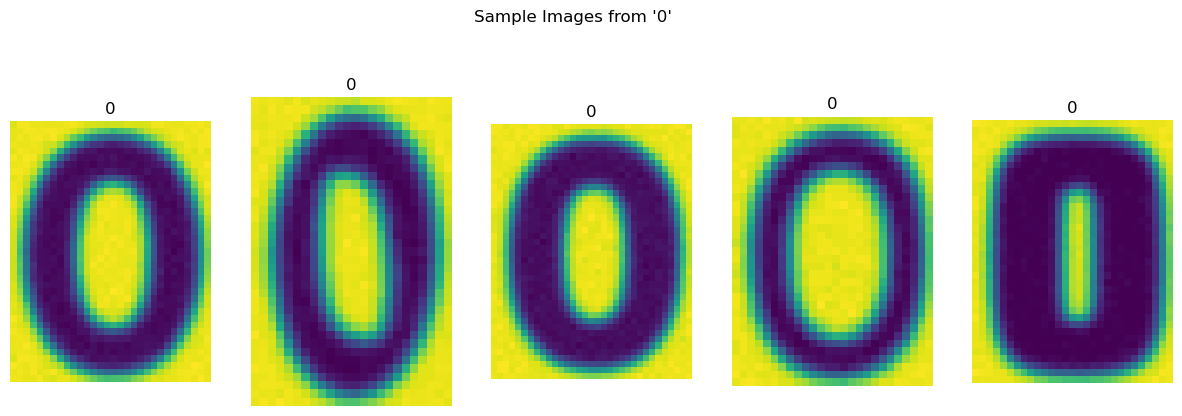

In [15]:
def display_sample_images(label, title):
    sample_images = df[df['label'] == label]['data'].sample(5).tolist()
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(sample_images):
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

most_common_label = label_counts.idxmax()
least_common_label = label_counts.idxmin()

display_sample_images(most_common_label, f"Sample Images from '{most_common_label}'")
display_sample_images(least_common_label, f"Sample Images from '{least_common_label}'")


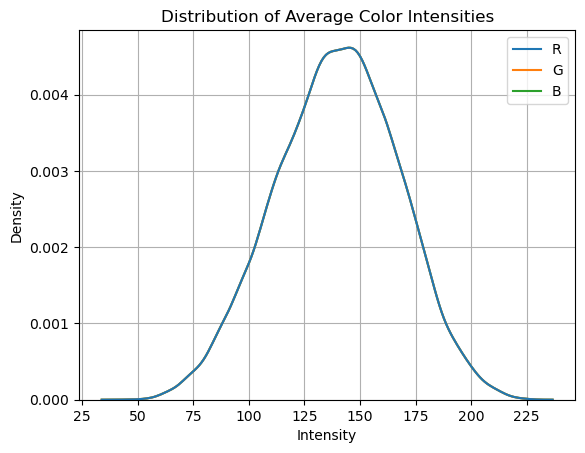

In [16]:
 # Analyze the average color intensity of the images
def average_intensity(image):
    """Compute the average intensity for the R, G, and B channels of an image."""
    np_image = np.array(image)
    # If it's not a RGB image, convert it.
    if len(np_image.shape) == 2:
        np_image = np.stack([np_image]*3, axis=-1)
    return np.mean(np_image, axis=(0,1))

avg_intensities = [average_intensity(img) for img in df['data']]
avg_colors_df = pd.DataFrame(avg_intensities, columns=['R', 'G', 'B'])

# Plotting average color intensities
sns.kdeplot(data=avg_colors_df)
plt.title("Distribution of Average Color Intensities")
plt.xlabel("Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [22]:
df.head()

,data,label
0,<PIL.Image.Image image mode=L size=27x30 at 0x...,0
1,<PIL.Image.Image image mode=L size=27x29 at 0x...,0
2,<PIL.Image.Image image mode=L size=27x30 at 0x...,0
3,<PIL.Image.Image image mode=L size=26x28 at 0x...,0
4,<PIL.Image.Image image mode=L size=26x29 at 0x...,0


Histograms of Pixel Intensity of Images and Images with Outliers if detected

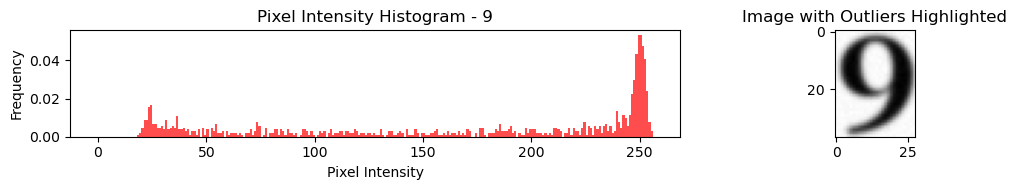

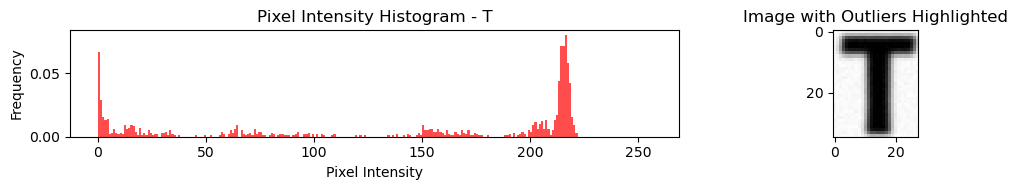

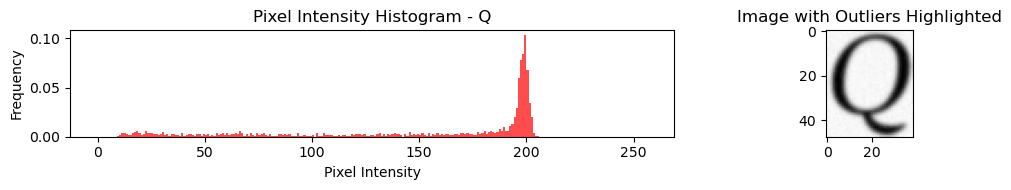

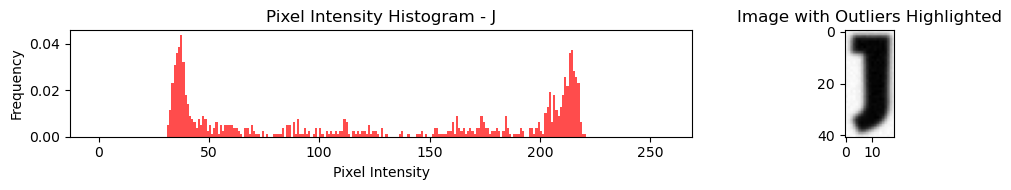

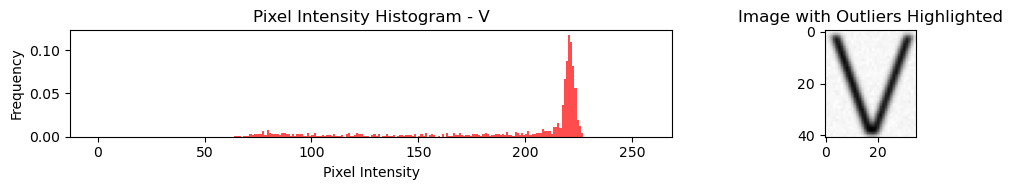

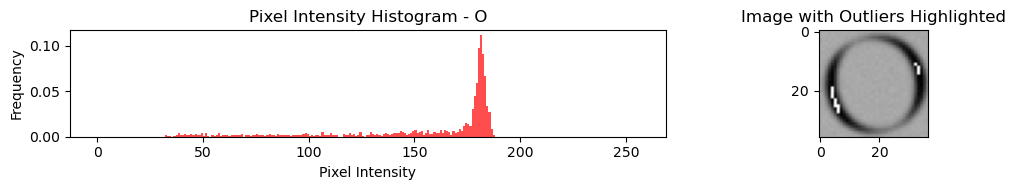

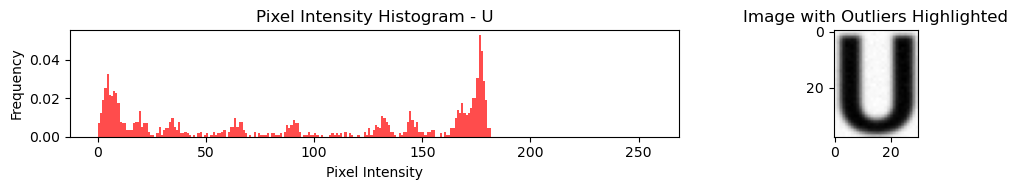

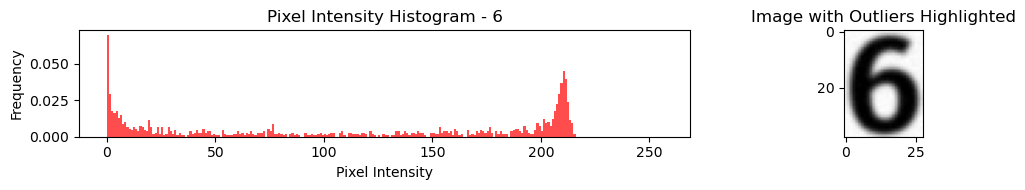

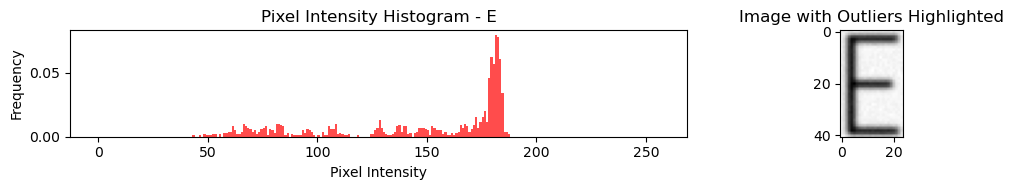

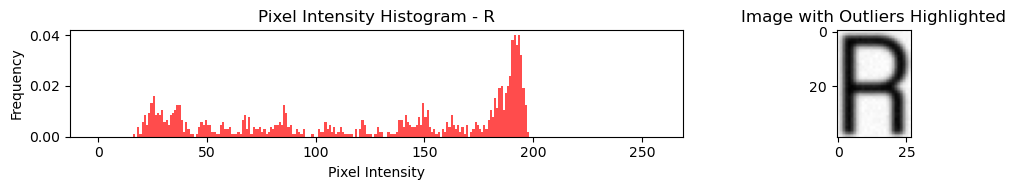

In [61]:
unique_labels = list(set(labels))
unique_labels = random.sample(unique_labels, 10)

for idx, label in enumerate(unique_labels):
    label_dir = os.path.join(training_dir, label)
    image_files = random.sample(os.listdir(label_dir), 1)
    
    plt.figure(figsize=(12, 2))

    for i, image_file in enumerate(image_files):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            image_array = np.array(image)
            pixel_values = image_array.flatten()
            
            mean_value = np.mean(image_array)
            std_dev = np.std(image_array)
            # Plot histogram
            plt.subplot(1, 2, 1)
            plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='red', alpha=0.7)
            plt.title(f'Pixel Intensity Histogram - {label}')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            
            # Set a threshold for outlier detection (adjust as needed)
            threshold = 3.0
            # Identify outliers based on the threshold
            outliers = np.abs((image_array - mean_value) / std_dev) > threshold
            # Plot the image with identified outliers
            plt.subplot(1, 2, 2)
            plt.imshow(np.where(outliers, 255, image_array), cmap='gray')
            plt.title('Image with Outliers Highlighted')

        plt.tight_layout()
        plt.show()

Image Filtering for Noise Reduction:

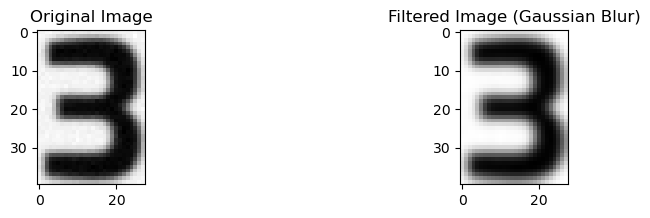

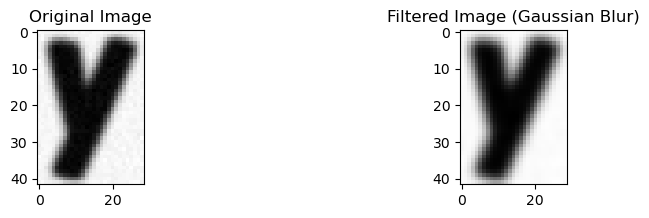

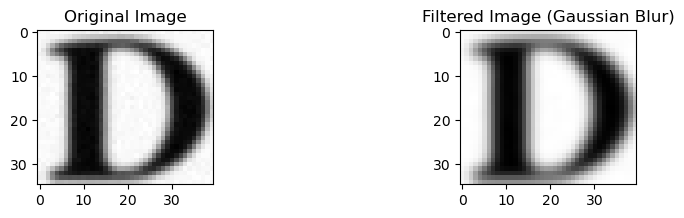

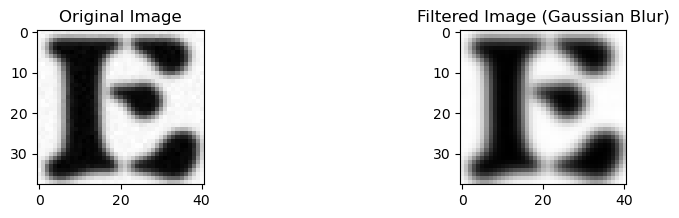

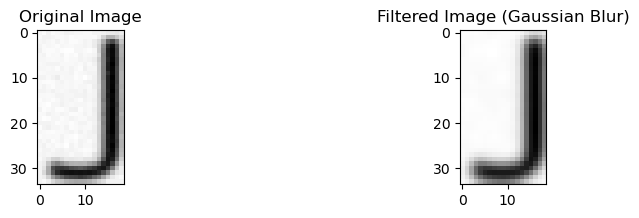

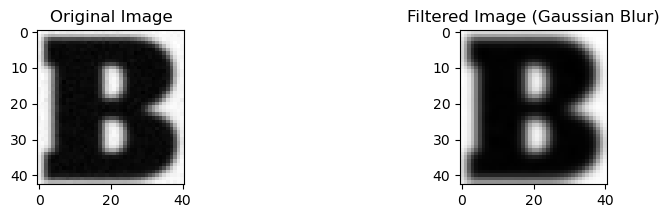

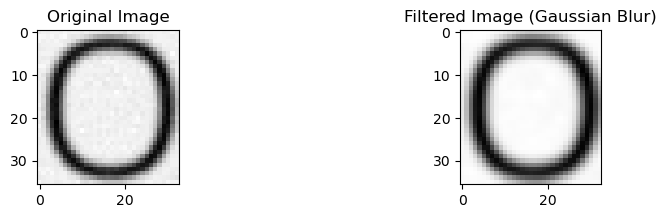

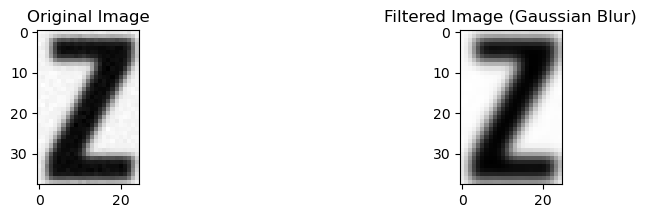

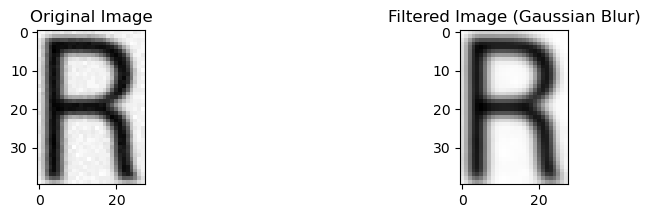

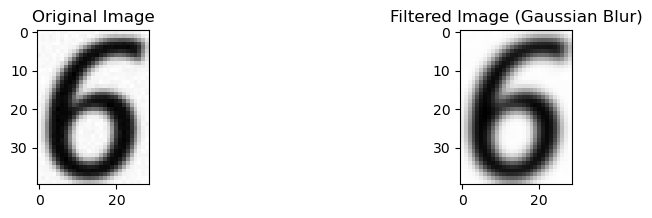

In [63]:
from skimage import filters

unique_labels = list(set(labels))
unique_labels = random.sample(unique_labels, 10)

for idx, label in enumerate(unique_labels):
    label_dir = os.path.join(training_dir, label)
    image_files = random.sample(os.listdir(label_dir), 1)
    
    plt.figure(figsize=(10, 2))

    for i, image_file in enumerate(image_files):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            image_array = np.array(image)
            
            # Apply Gaussian blur to reduce noise
            blurred_image = filters.gaussian(image_array, sigma=1)
            
            # Display the original and filtered images for comparison
            plt.subplot(1, 2, 1)
            plt.imshow(image_array, cmap='gray')
            plt.title('Original Image')

            plt.subplot(1, 2, 2)
            plt.imshow(blurred_image, cmap='gray')
            plt.title('Filtered Image (Gaussian Blur)')

            plt.show()

Z-score method for Noise Detection:

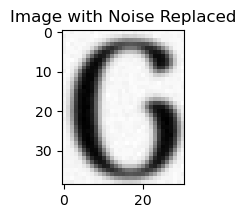

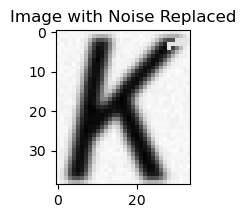

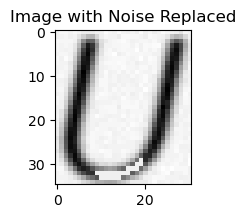

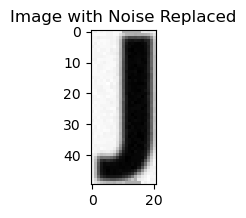

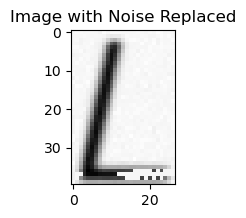

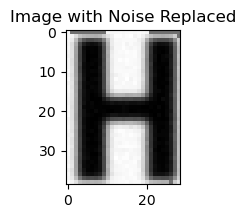

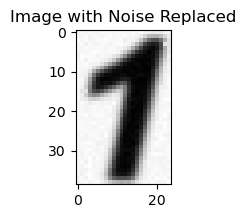

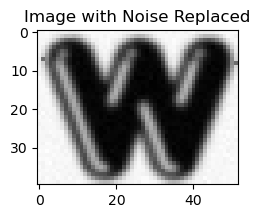

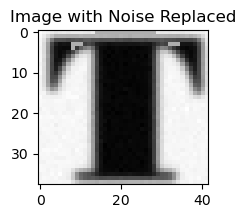

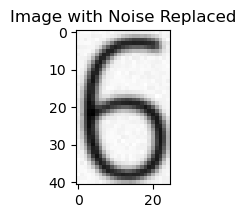

In [64]:
from scipy.stats import zscore

unique_labels = list(set(labels))
unique_labels = random.sample(unique_labels, 10)

for idx, label in enumerate(unique_labels):
    label_dir = os.path.join(training_dir, label)
    image_files = random.sample(os.listdir(label_dir), 1)
    
    plt.figure(figsize=(10, 2))

    for i, image_file in enumerate(image_files):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            image_array = np.array(image)
            
            # Calculate Z-scores for pixel values
            z_scores = zscore(image_array)

            # Define a threshold for noise detection
            threshold = 3.0

            # Identify noisy pixels based on the threshold
            noisy_pixels = np.abs(z_scores) > threshold

            # Replace noisy pixels with a chosen value (e.g., median pixel value)
            median_pixel_value = np.median(image_array)
            image_array[noisy_pixels] = median_pixel_value

            # Display the image with noise replaced
            plt.imshow(image_array, cmap='gray')
            plt.title('Image with Noise Replaced')
            plt.show()

Frequency Domain Analysis:

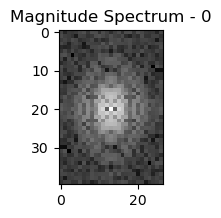

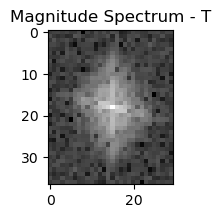

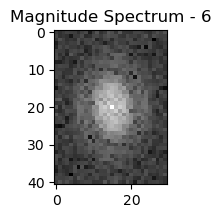

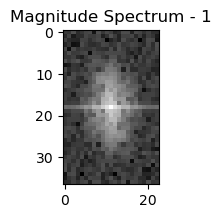

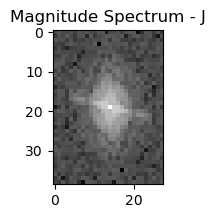

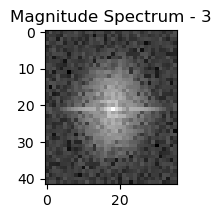

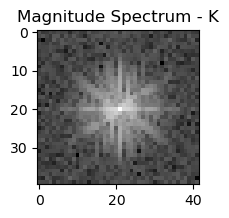

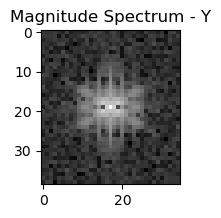

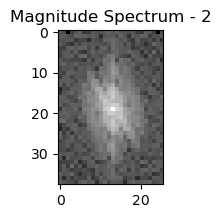

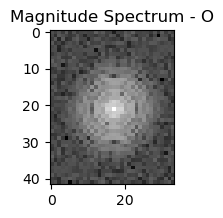

In [67]:
from scipy.fft import fft2, ifft2, fftshift

unique_labels = list(set(labels))
unique_labels = random.sample(unique_labels, 10)

for idx, label in enumerate(unique_labels):
    label_dir = os.path.join(training_dir, label)
    image_files = random.sample(os.listdir(label_dir), 1)
    
    plt.figure(figsize=(10, 2))

    for i, image_file in enumerate(image_files):
        with Image.open(os.path.join(label_dir, image_file)) as image:
            image_array = np.array(image)

            # Apply 2D Fourier Transform
            image_fft = fft2(image_array)

            # Shift zero frequency component to the center
            image_fft_shifted = fftshift(image_fft)

            # Visualize the magnitude spectrum
            magnitude_spectrum = np.abs(image_fft_shifted)
            plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
            plt.title(f'Magnitude Spectrum - {label}')
            plt.show()